In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

##題目一

In [17]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/雲科/專案四/distance.xlsx')
print(df.head())
#cities = df.drop(df.columns[1:], axis=1)

df = df.drop(df.columns[0], axis=1)
#print(df.head())

      地點         緯度          經度
0  台北高鐵站  25.047128  121.508186
1  新竹高鐵站  24.808165  121.031511
2  台中高鐵站  24.112145  120.613956
3  台南高鐵站  22.924645  120.283468
4  高雄高鐵站  22.687650  120.306067


MDS的重要參數有：

1.n_components：想要降低成幾維度的資料

2.dissimilarity（default=’euclidean’）：若要放入別的distance metric則輸入‘precomputed’，並在fit_transform語法中放入metric

In [19]:
X_scaled = MinMaxScaler().fit_transform(df)
mds_sklearn = MDS(n_components=2)
X_sklearn = mds_sklearn.fit_transform(X_scaled)

print(X_scaled)
print('='*30)
print(X_sklearn)

[[1.         1.        ]
 [0.89872173 0.61078827]
 [0.60373293 0.26984831]
 [0.10044373 0.        ]
 [0.         0.01845233]
 [0.34351864 0.89154872]
 [0.18375231 0.74639494]]
[[-0.22378911  0.70733625]
 [ 0.1217329   0.45762941]
 [ 0.29832627  0.0366154 ]
 [ 0.28325117 -0.54467419]
 [ 0.21654304 -0.62481105]
 [-0.37428716  0.08737421]
 [-0.32177711 -0.11947003]]


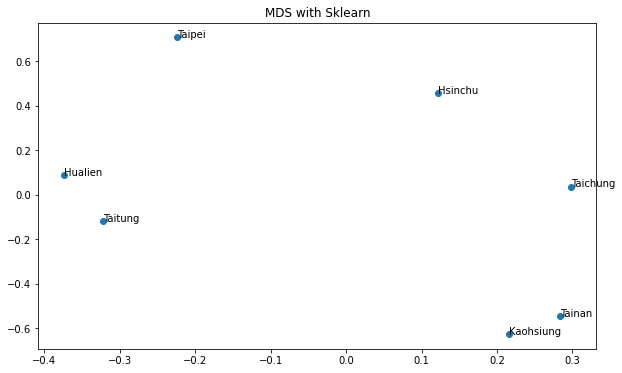

0.005111497186824694


In [23]:
cities = ['Taipei','Hsinchu','Taichung','Tainan','Kaohsiung','Hualien','Taitung']

plt.figure(figsize=(10,6)) #圖的大小
plt.scatter(X_sklearn[:,0],X_sklearn[:,1]) #分佈(x,y)
plt.title('MDS with Sklearn')
for label, x, y in zip(cities, X_sklearn[:, 0], X_sklearn[:, 1]):
    plt.annotate( #註解
        label,
        xy = (x, y), 
        #xytext = (-10, 10),
        #textcoords = 'offset points'
    )
plt.show()
print(mds_sklearn.stress_) #壓力係數，越大越不能解釋原始資料之間的關係

##題目二

In [24]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/雲科/專案四/DrinkData.csv')
df = df.drop(columns=['Class'])
print(df.shape)
df.head(3)

(7, 5)


,Drink,Rank,MU,sigma,Count
0,7Up,7,100,200,300
1,Sprite,6,200,10,150
2,Pepsi,5,500,50,150


In [28]:
target = df['Drink']
data_x = df.iloc[:,1:]

In [26]:
data_x 

,Rank,MU,sigma,Count
0,7,100,200,300
1,6,200,10,150
2,5,500,50,150
3,4,400,100,300
4,3,800,50,150
5,2,800,50,150
6,1,900,400,300


In [27]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data = scale.fit_transform(data_x.values)
data.shape

(7, 4)

In [29]:
df_matrix = np.asmatrix(data) #將輸入解釋為矩陣
print(df_matrix.shape)

(7, 4)


In [32]:
covar_matrix = np.cov(df_matrix.T) #沒T會是(7,7)
print(covar_matrix.shape)

(4, 4)


In [33]:
eigvalues, eigvectors = np.linalg.eig(covar_matrix) #計算特徵向量

In [34]:
print(eigvalues)

[2.55024402 1.91405306 0.02528903 0.17708055]


In [35]:
print(eigvectors)

[[ 0.62361211 -0.27279177 -0.64206547 -0.35276693]
 [-0.58234587  0.38841435 -0.71346415 -0.03124863]
 [-0.47591865 -0.51184717  0.14051716 -0.70126232]
 [-0.21326662 -0.71605266 -0.24284925  0.61871656]]


In [36]:
top2eig = eigvectors[:,0:2]
top2eig

array([[ 0.62361211, -0.27279177],
       [-0.58234587,  0.38841435],
       [-0.47591865, -0.51184717],
       [-0.21326662, -0.71605266]])

In [37]:
new_data = data_x.dot(top2eig)
#print(new_data)

#creating a new dataframe including target
new_df = pd.DataFrame(np.hstack((new_data,np.array(target).reshape(-1,1))),columns=['1st_component','2nd_component','Species'])

new_df

            0           1
0 -213.033020 -280.253340
1 -149.476682  -36.480251
2 -343.840801   59.842959
3 -342.015753 -111.725941
4 -519.791787  176.912849
5 -520.415399  177.185640
6 -777.835120  -70.254542


,1st_component,2nd_component,Species
0,-213.03302,-280.25334,7Up
1,-149.476682,-36.480251,Sprite
2,-343.840801,59.842959,Pepsi
3,-342.015753,-111.725941,Coke
4,-519.791787,176.912849,Cappuccino
5,-520.415399,177.18564,Espresso
6,-777.83512,-70.254542,Latte


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


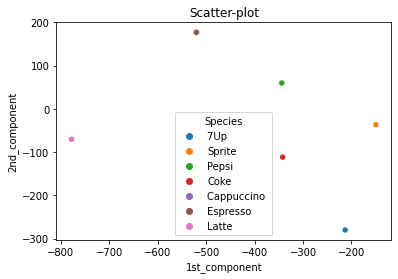

In [ ]:
#plotting data
sns.scatterplot(new_df['1st_component'],new_df['2nd_component'],hue=new_df['Species'])
plt.title('Scatter-plot')
plt.show()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,perplexity=20,n_iter=1000)
tsne_result = tsne.fit_transform(data)

#creating a new dataframe including target
new_df_tsne = pd.DataFrame(np.hstack((tsne_result,np.array(target).reshape(-1,1))),columns=['1st_component','2nd_component','Species'])
new_df_tsne.head()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,1st_component,2nd_component,Species
0,-611.91571,-79.915527,7Up
1,453.391479,226.375793,Sprite
2,54.42387,611.099304,Pepsi
3,-212.968719,-464.632965,Coke
4,-79.249344,73.223335,Cappuccino


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


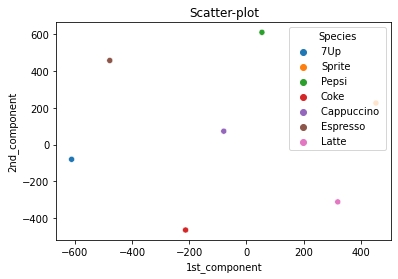

In [ ]:
#plotting data
sns.scatterplot(new_df_tsne['1st_component'],new_df_tsne['2nd_component'],hue=new_df_tsne['Species'])
plt.title('Scatter-plot')
plt.show()